
Creacion y entrenamiento del modelo de aprendizaje de máquina

In [10]:

from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

pacientes = pd.read_csv('pacientes.csv')

saludables = pacientes[pacientes['problema_cardiaco'] == 0]
cardiacos = pacientes[pacientes['problema_cardiaco'] == 1]

datos_entrenamiento, datos_prueba, clases_entrenamiento, clases_prueba = train_test_split(pacientes[['edad', 'colesterol']], pacientes['problema_cardiaco'],test_size=0.30)

Generación del árbol de decisión

In [11]:

arbol_decision = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2) #criterion='entropy' es la medida de impureza y max_depth=2 es la profundidad máxima del árbol

arbol = arbol_decision.fit(datos_entrenamiento, clases_entrenamiento)
accuracy = arbol.score(datos_prueba, clases_prueba) #Precisión del modelo
print("Precisión del modelo: ", accuracy)
print(tree.export_text(arbol, feature_names= ["Edad","Colesterol"])) #Impresión del árbol de decisión como texto

Precisión del modelo:  0.5777777777777777
|--- Edad <= 54.50
|   |--- Colesterol <= 273.50
|   |   |--- class: 1
|   |--- Colesterol >  273.50
|   |   |--- class: 1
|--- Edad >  54.50
|   |--- Colesterol <= 353.50
|   |   |--- class: 0
|   |--- Colesterol >  353.50
|   |   |--- class: 1



Visualización del árbol de decisión

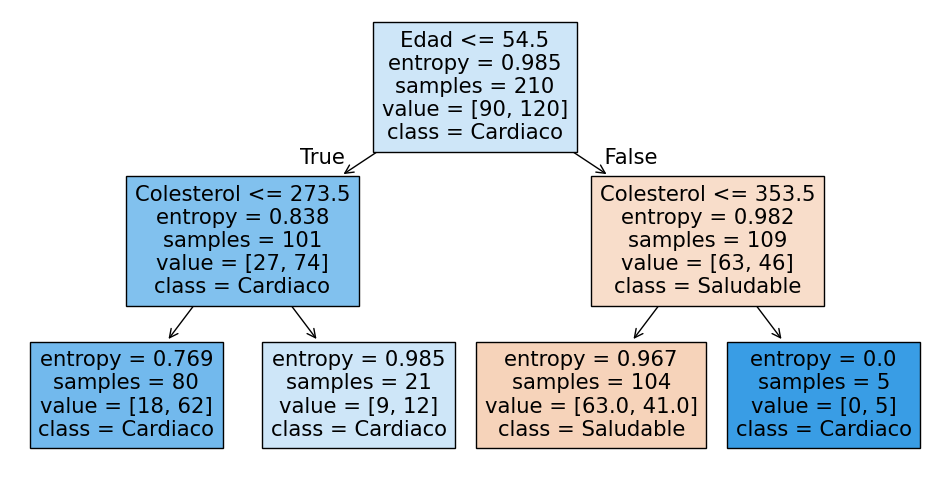

In [12]:
plt.figure(figsize=(12,6))
tree.plot_tree(arbol, feature_names= ["Edad","Colesterol"], class_names=["Saludable","Cardiaco"], filled=True)
plt.show()

Registro de nuevo paciente

In [13]:
print("Nuevo paciente", arbol_decision.predict([[40, 100]])) #Predicción de un nuevo paciente [Edad, Colesterol]

Nuevo paciente [1]


c:\Users\User\anaconda3\envs\customer_segmentation\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
